In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"Diwali_Sales_Data.csv",encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount']=df['Amount'].astype('int')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df['Amount'].dtype

dtype('int32')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


EDA


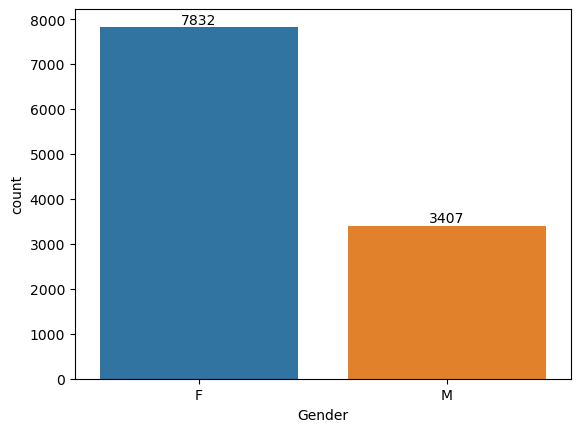

In [14]:
ax=sea.countplot(x="Gender",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

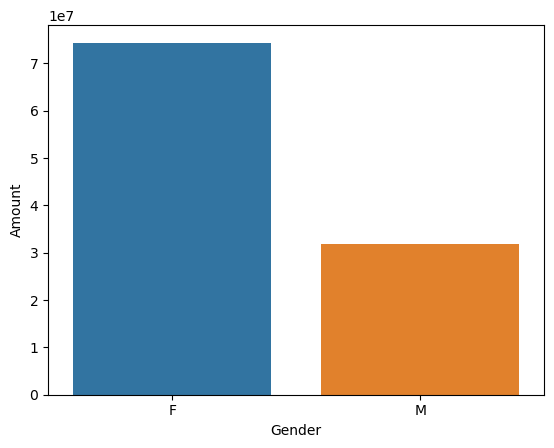

In [15]:
vx=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sea.barplot(data=vx,x="Gender",y="Amount")


From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

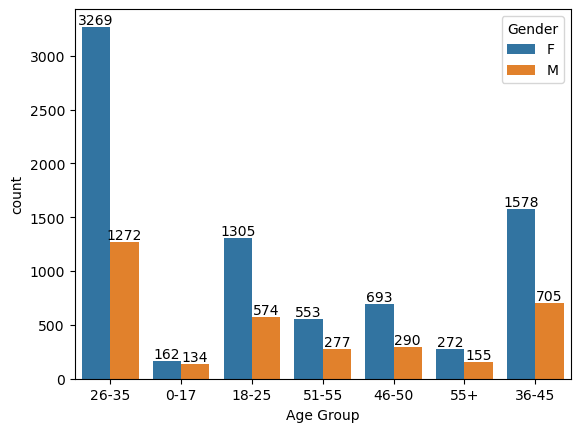

In [16]:
age=sea.countplot(data=df,x="Age Group",hue="Gender")
for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

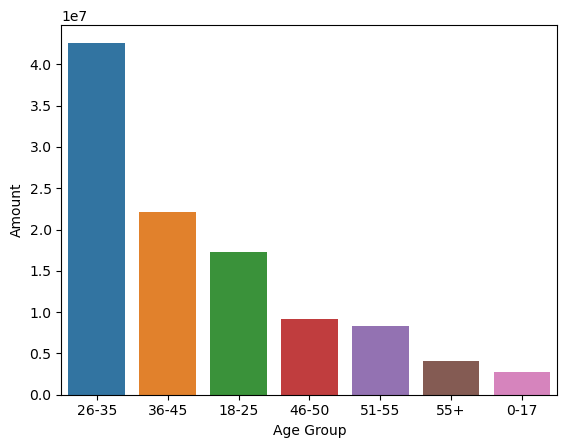

In [17]:
vx=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sea.barplot(data=vx,x="Age Group",y="Amount")

From above graphs w can see that most of the buyers are of age group between 26-35 yrs female

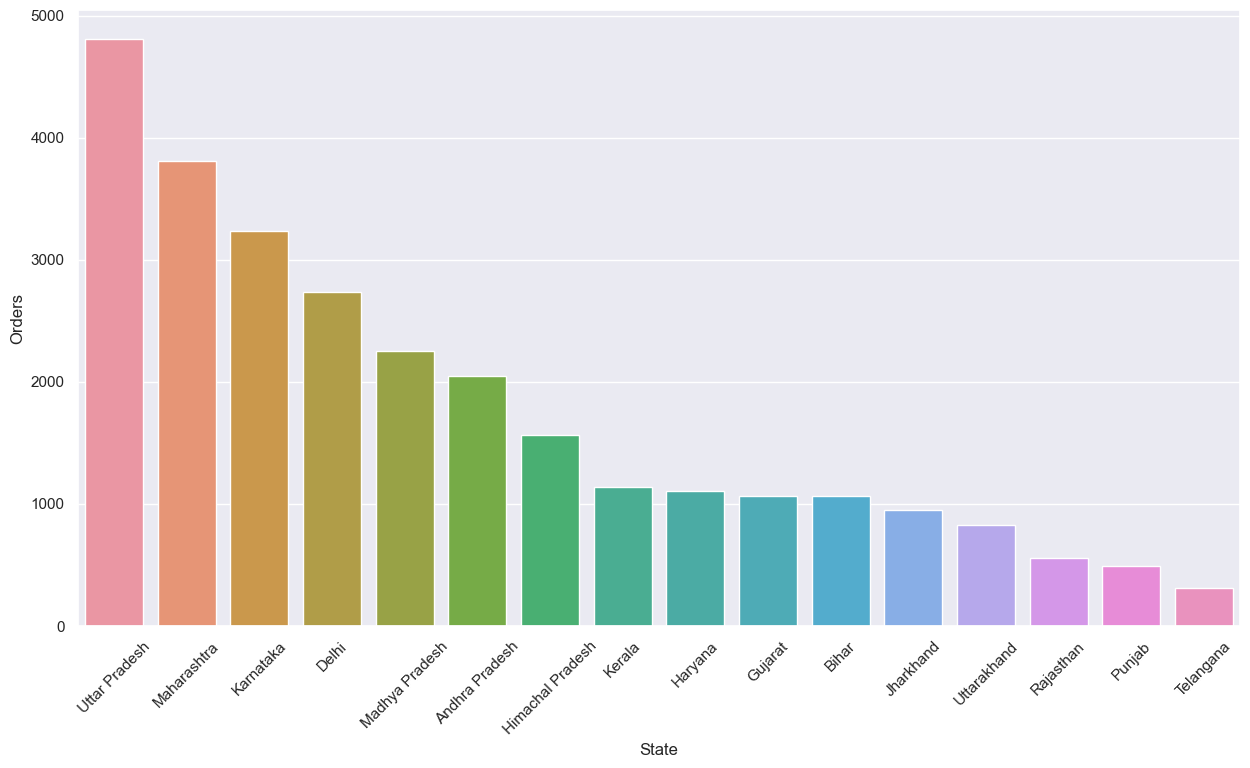

In [18]:
State=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)

sea.set(rc={'figure.figsize':(15,8)})
sea.barplot(data=State,x="State",y="Orders")
plt.xticks(rotation=45)
plt.show()

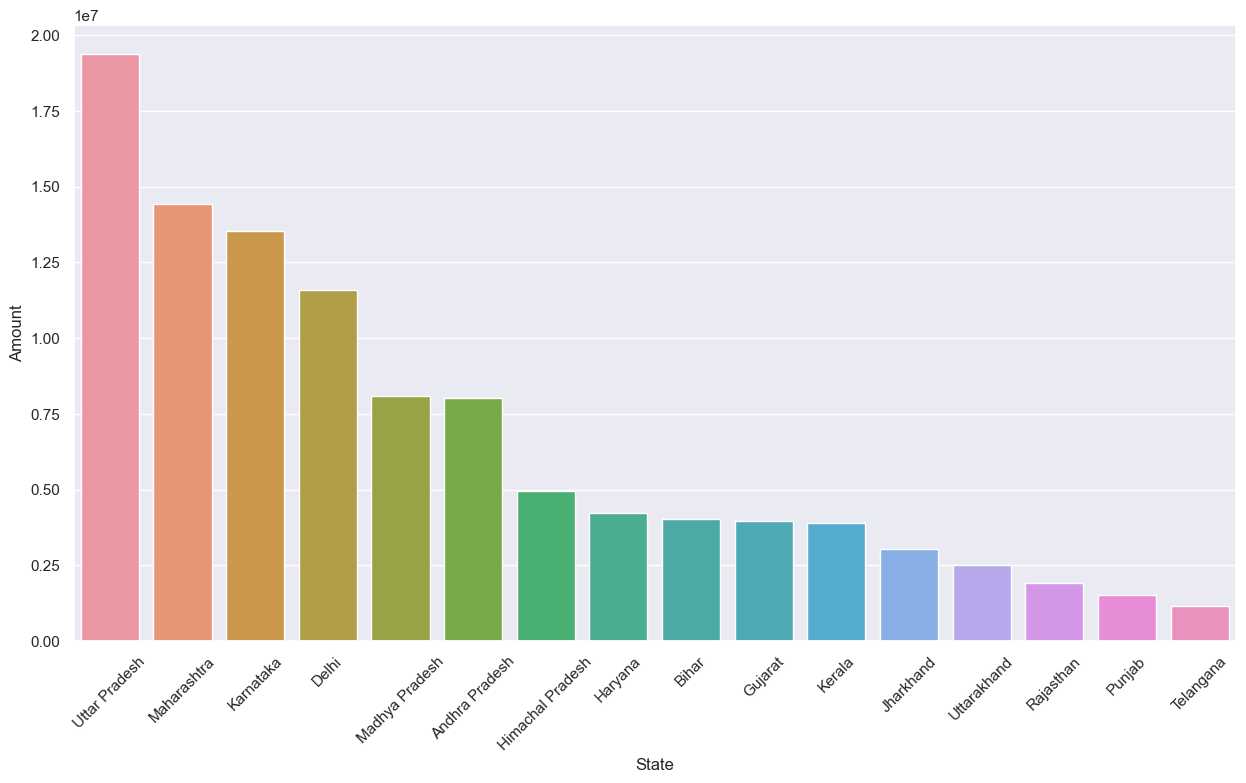

In [19]:
State=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sea.set(rc={'figure.figsize':(15,8)})
sea.barplot(data=State,x="State",y="Amount")
plt.xticks(rotation=45)
plt.show()

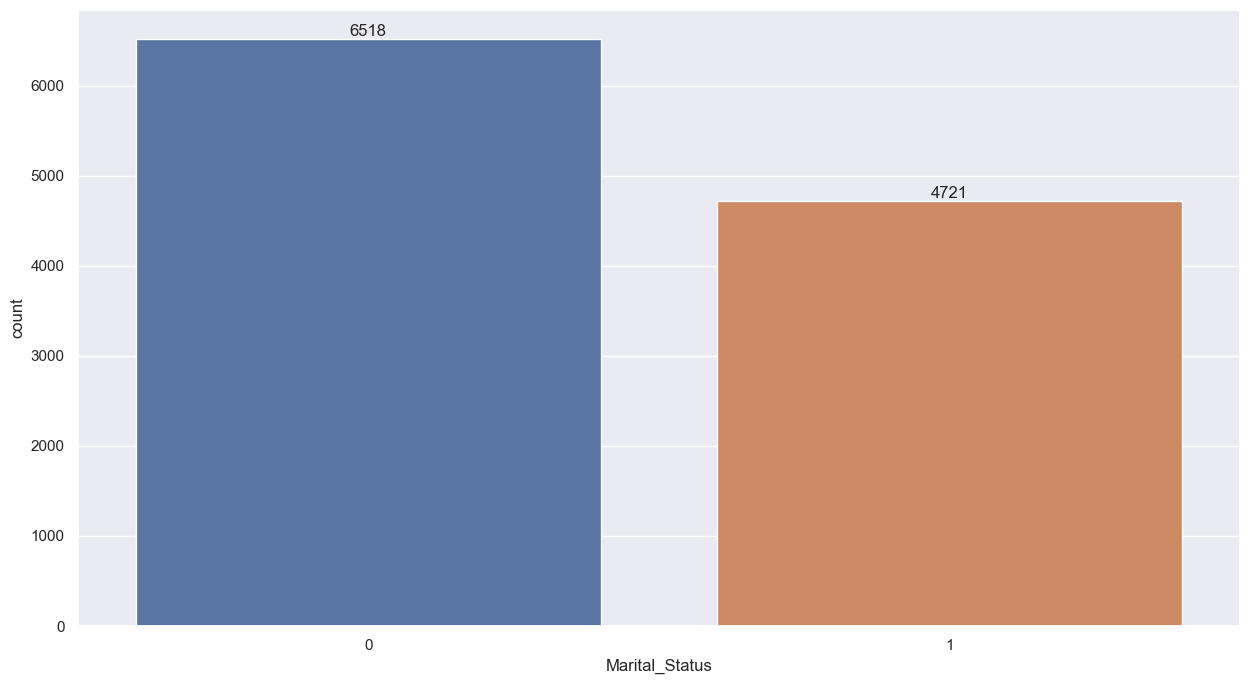

In [20]:
MS=sea.countplot(data=df,x="Marital_Status")

sea.set(rc={'figure.figsize':(5,5)})
for bars in MS.containers:
    MS.bar_label(bars)

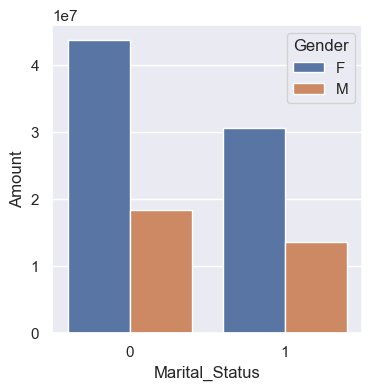

In [21]:
MS=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sea.set(rc={'figure.figsize':(4,4)})
sea.barplot(data=MS,x="Marital_Status",y="Amount",hue="Gender")
plt.show()

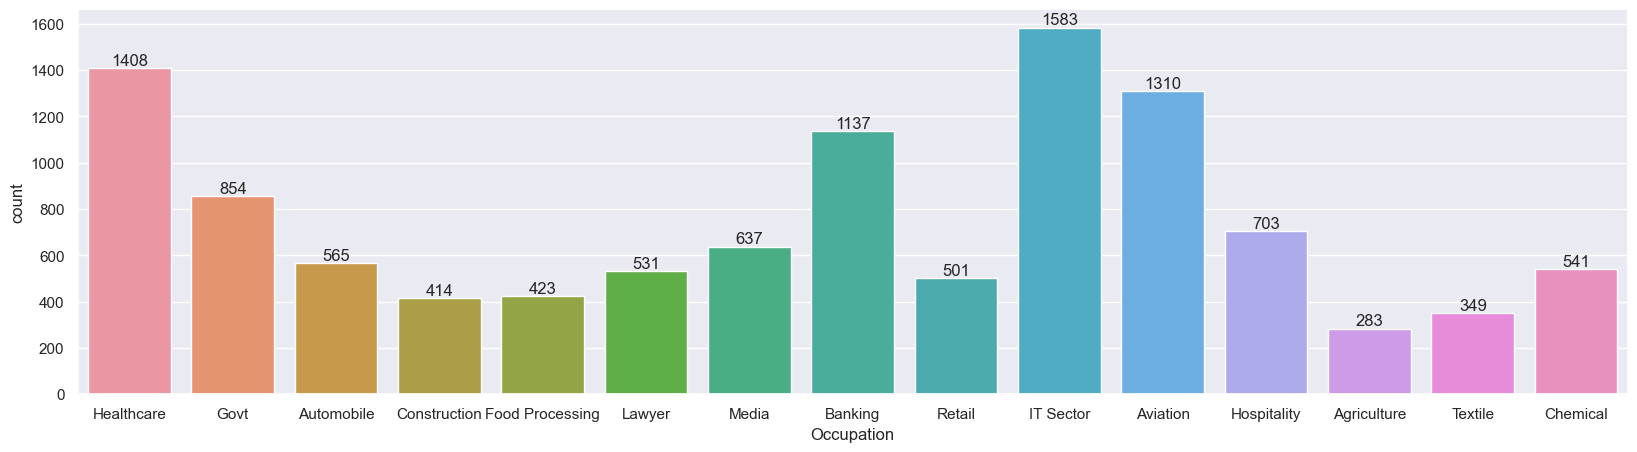

In [22]:
sea.set(rc={'figure.figsize':(20,5)})
OC=sea.countplot(data=df,x="Occupation")

sea.set(rc={'figure.figsize':(5,5)})
for bars in OC.containers:
    OC.bar_label(bars)

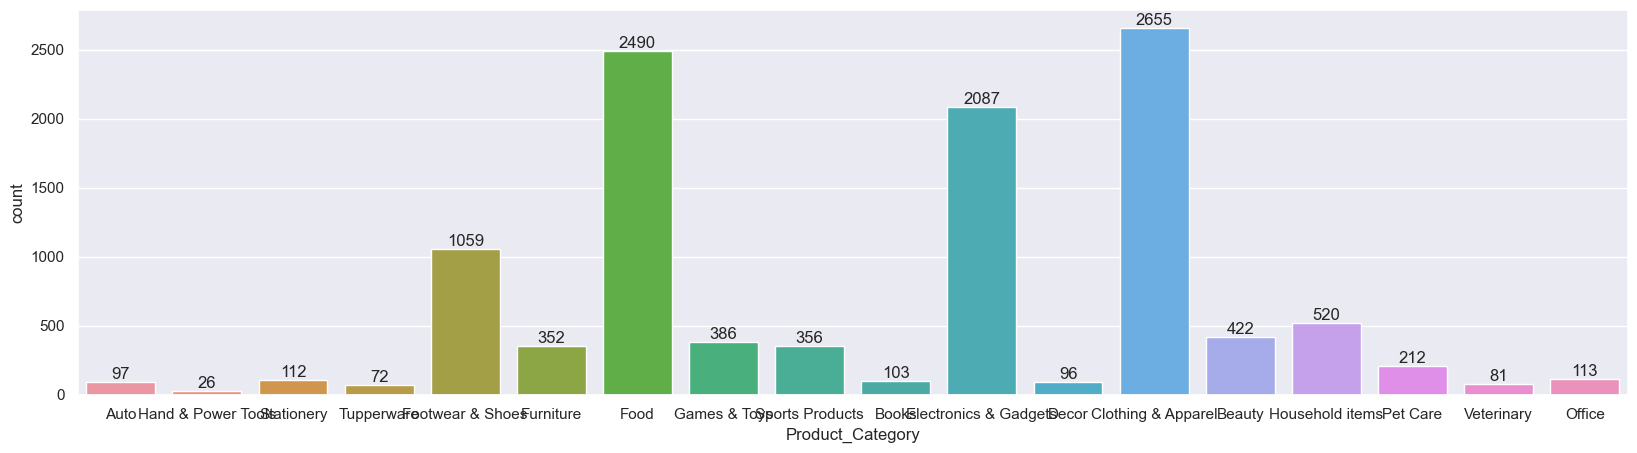

In [23]:
sea.set(rc={'figure.figsize':(20,5)})
PC=sea.countplot(data=df,x="Product_Category")

sea.set(rc={'figure.figsize':(5,5)})
for bars in PC.containers:
    PC.bar_label(bars)

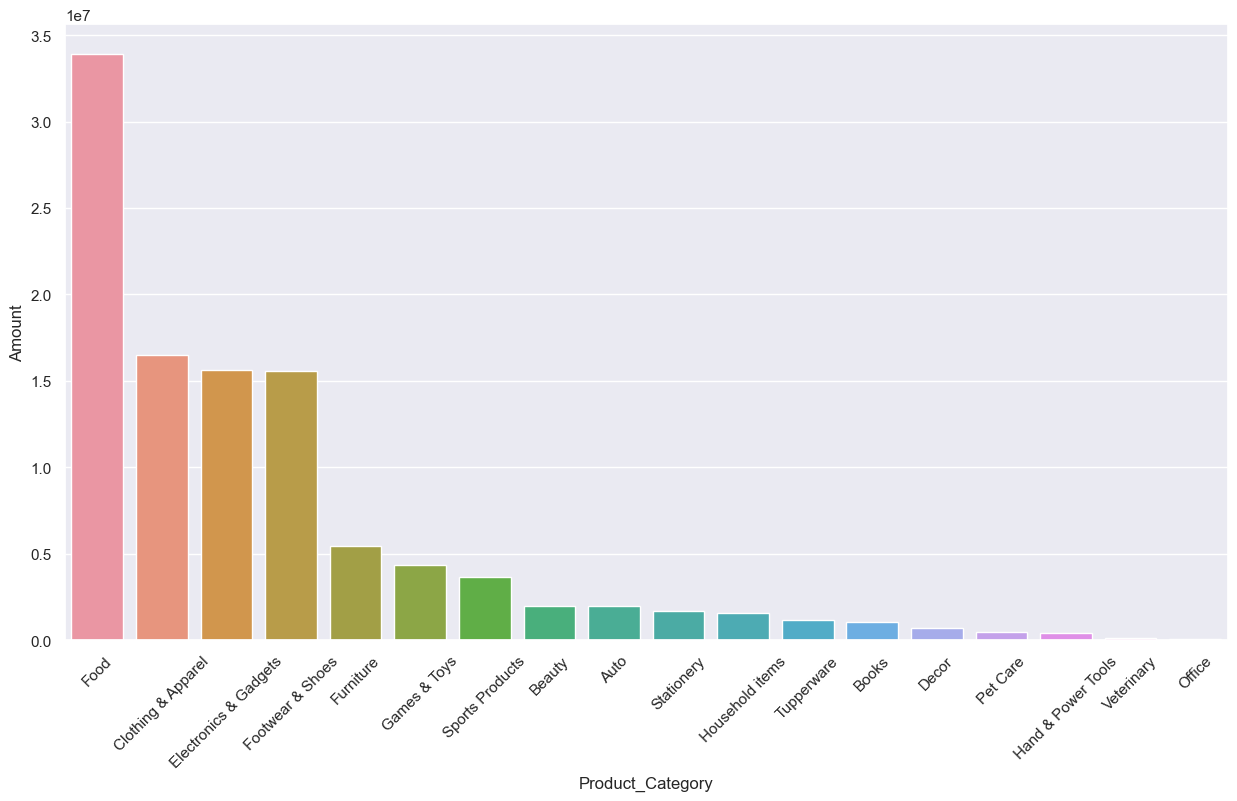

In [24]:
PC=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sea.set(rc={'figure.figsize':(15,8)})
sea.barplot(data=PC,x="Product_Category",y="Amount")
plt.xticks(rotation=45)
plt.show()

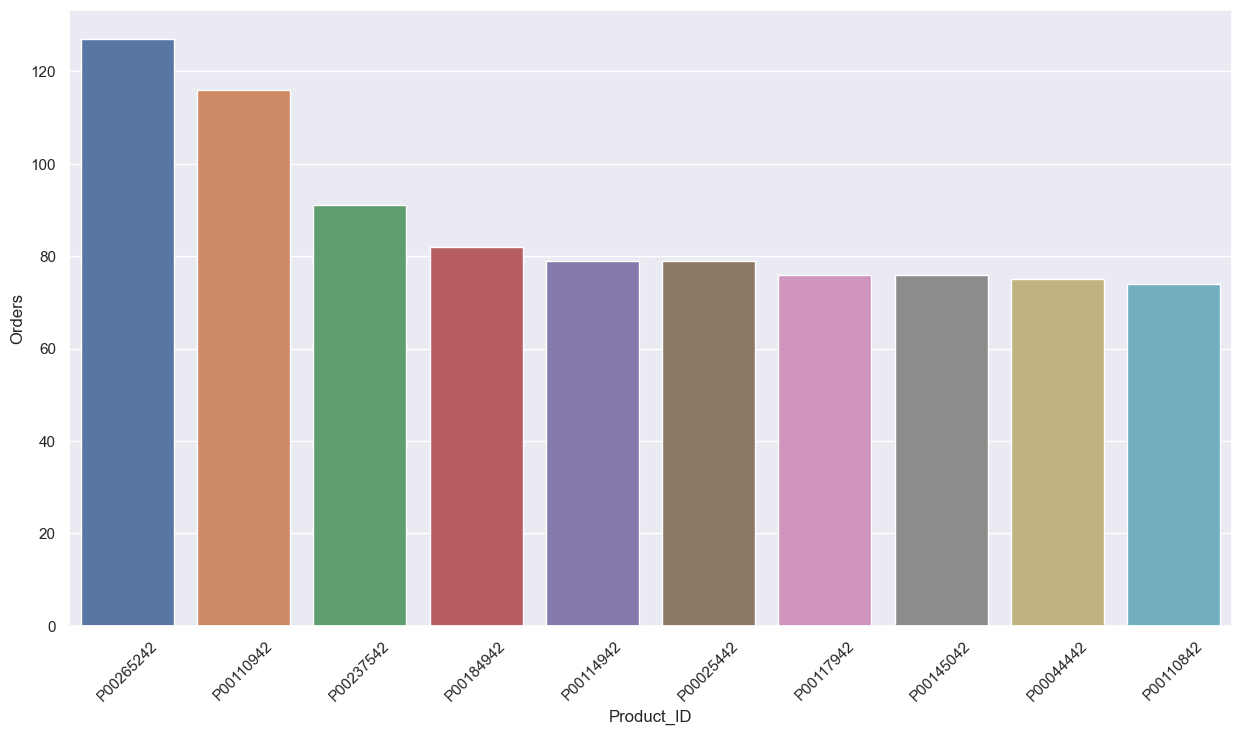

In [25]:
PI=df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)

sea.set(rc={'figure.figsize':(15,8)})
sea.barplot(data=PI,x="Product_ID",y="Orders")
plt.xticks(rotation=45)
plt.show()

Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Kernataka working in IT, Healthcare and Aviation are more likly to buy products from Food Clothing and Elecronics category.